In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
%load_ext autoreload
%autoreload 2

In [2]:
%run proj1_helpers.py
%run implementations.py

In [3]:
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Spliting the data

In [4]:
ratio_train_test = 0.9
x_train, y_train, x_test, y_test = split_data(tX, y, ratio_train_test, seed=1)

## Cleaning the data
We see that the column 22 can be used to make categories, since the values of some other columns seems to be proportional to the value of this column.

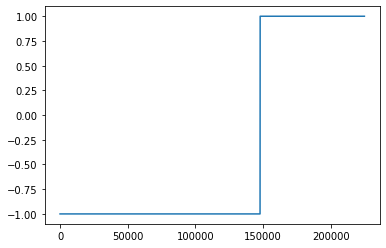

In [5]:
# categorical column
plt.plot(np.sort(y_train))

In [6]:
# preprocessing training dataset
categorical_datasets = preprocessing(copy.deepcopy(y_train),copy.deepcopy(x_train))
y0, x0 = categorical_datasets[0]
y1, x1 = categorical_datasets[1]
y2, x2 = categorical_datasets[2]
columns_to_keep = categorical_datasets[3]

# clean high correlation areas
x1 = np.delete(x1, 5, 1)
x1 = np.delete(x1, 18, 1)
x2 = np.delete(x2, 6, 1)
x2 = np.delete(x2, 7, 1)
x2 = np.delete(x2, 22, 1)
x2 = np.delete(x2, 24, 1)

# preprocessing
categorical_datasets_test = preprocessing(_,copy.deepcopy(x_test), train = False, columns_to_keep = columns_to_keep)
x0_test = categorical_datasets_test[0]
x1_test = categorical_datasets_test[1]
x2_test = categorical_datasets_test[2]

rows_to_keep0 = categorical_datasets_test[3]
rows_to_keep1 = categorical_datasets_test[4]
rows_to_keep2 = categorical_datasets_test[5]


y0_test = y_test[np.where(rows_to_keep0)]
y1_test = y_test[np.where(rows_to_keep1)]
y2_test = y_test[np.where(rows_to_keep2)]

# clean high correlation areas
x1_test = np.delete(x1_test, 5, 1)
x1_test = np.delete(x1_test, 18, 1)
x2_test = np.delete(x2_test, 6, 1)
x2_test = np.delete(x2_test, 7, 1)
x2_test = np.delete(x2_test, 22, 1)
x2_test = np.delete(x2_test, 24, 1)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:959: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [7]:
import pandas as pd
x0_df=pd.DataFrame(data=x0[0:,0:], index=[i for i in range(x0.shape[0])], columns=['f'+str(i) for i in range(x0.shape[1])])
x1_df=pd.DataFrame(data=x1[0:,0:], index=[i for i in range(x1.shape[0])], columns=['f'+str(i) for i in range(x1.shape[1])])
x2_df=pd.DataFrame(data=x2[0:,0:], index=[i for i in range(x2.shape[0])], columns=['f'+str(i) for i in range(x2.shape[1])])

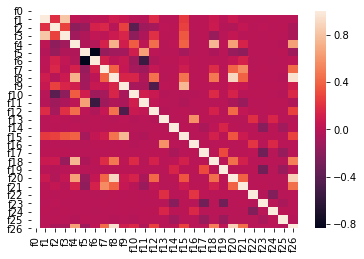

In [8]:
import seaborn as sns
# calculate the correlation matrix
corr = x2_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

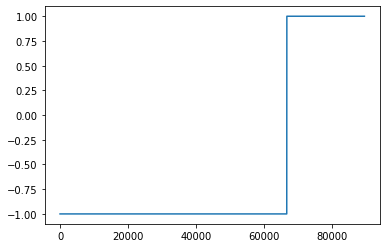

In [9]:
plt.plot(np.sort(y0))

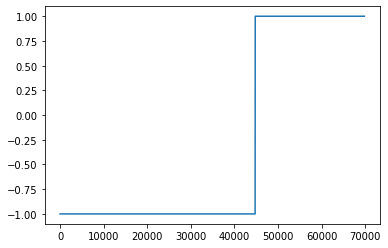

In [10]:
plt.plot(np.sort(y1))

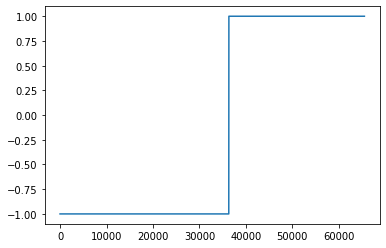

In [11]:
plt.plot(np.sort(y2))

In [12]:
print(x0.shape)
print(x1.shape)
print(x2.shape)

(89647, 19)
(69837, 21)
(65516, 27)


## Grid search on poly degrees and lambdas

In [13]:
%run implementations.py

<Figure size 432x288 with 0 Axes>

In [37]:
## Set hyperparameters
lambdas0 = np.logspace(-8, 2, 40)
lambdas1 = np.logspace(-8, 2, 40)
lambdas2 = np.logspace(-8, 2, 40)

degrees0 = [i for i in range(5)]
degrees1 = [i for i in range(6,15)]
degrees2 = [i for i in range(10)]

In [38]:
def grid_search_ridge_regression(y_train,x_train,y_test,x_test,lambdas,degrees):
    # define lists to store the loss of training data and test data
    data = []
    for degree in degrees:
        data_nested = []        
        phi_x_train = build_poly(x_train, degree)
        phi_x_test = build_poly(x_test, degree)
        for lambda_ in lambdas:
            w = ridge_regression(y_train,phi_x_train,lambda_)[1]
            y_pred_train = predict_labels(w, phi_x_train)
            acc_train,_ = metrics_check(y_train,y_pred_train)
            y_pred_test = predict_labels(w, phi_x_test)
            acc_test,_ = metrics_check(y_test,y_pred_test)
            data_nested.append([acc_train, acc_test, degree, lambda_, w])
        data_nested = np.array(data_nested)
        index_best_value = np.where(data_nested[:,1] == np.amax(data_nested[:,1]))
        best_value = data_nested[index_best_value][0]
        print("Running :: Training accuracy: ",best_value[0]," ,testing accuracy: ",best_value[1]," ,degree: ",best_value[2]," , lambda : ",best_value[3])
        data.append(best_value)
    data = np.array(data)
    index_best_value = np.where(data[:,1] == np.amax(data[:,1]))
    best_value = data[index_best_value][0]
    acc_train, acc_test, degree, lambda_, w = best_value[0], best_value[1], best_value[2], best_value[3], best_value[4]
    print("Final :: Training accuracy: ",acc_train," ,testing accuracy: ",acc_test," ,degree: ",degree," , lambda : ",lambda_)
    
    return degree, lambda_, w

In [39]:
degree0, lambda0, w0 = grid_search_ridge_regression(y0, x0, y0_test, x0_test, lambdas0, degrees0)

Running :: Training accuracy:  0.8401396588842907  ,testing accuracy:  0.8415495539533179  ,degree:  0  , lambda :  55.41020330009481
Running :: Training accuracy:  0.8401731234731782  ,testing accuracy:  0.8415251130392276  ,degree:  1  , lambda :  100.0
Running :: Training accuracy:  0.8404408401842783  ,testing accuracy:  0.8415984357814982  ,degree:  2  , lambda :  55.41020330009481
Running :: Training accuracy:  0.8412105257286914  ,testing accuracy:  0.8433337406819015  ,degree:  3  , lambda :  100.0
Running :: Training accuracy:  0.7997813646859349  ,testing accuracy:  0.7231577661004521  ,degree:  4  , lambda :  55.41020330009481
Final :: Training accuracy:  0.8412105257286914  ,testing accuracy:  0.8433337406819015  ,degree:  3  , lambda :  100.0


In [40]:
degree1, lambda1, w1 = grid_search_ridge_regression(y1, x1, y1_test, x1_test, lambdas1, degrees1)

Running :: Training accuracy:  0.8056044790011025  ,testing accuracy:  0.8004863874676268  ,degree:  6  , lambda :  30.702906297578373
Running :: Training accuracy:  0.8098572389993843  ,testing accuracy:  0.8036447476470217  ,degree:  7  , lambda :  100.0
Running :: Training accuracy:  0.8103440869453156  ,testing accuracy:  0.804655422904428  ,degree:  8  , lambda :  55.41020330009481
Running :: Training accuracy:  0.8100863439151166  ,testing accuracy:  0.8044975048954582  ,degree:  9  , lambda :  30.702906297578373
Running :: Training accuracy:  0.8108452539484801  ,testing accuracy:  0.8049396753205735  ,degree:  10  , lambda :  9.426684551178854
Running :: Training accuracy:  0.8072941277546286  ,testing accuracy:  0.758574947887057  ,degree:  11  , lambda :  17.012542798525857
Running :: Training accuracy:  0.40847974569354356  ,testing accuracy:  0.6304086918072137  ,degree:  12  , lambda :  17.012542798525857
Running :: Training accuracy:  0.6409496398757106  ,testing accuracy

In [41]:
degree2, lambda2, w2 = grid_search_ridge_regression(y2, x2, y2_test, x2_test, lambdas2, degrees2)

Running :: Training accuracy:  0.8333078942548385  ,testing accuracy:  0.8251198857259463  ,degree:  0  , lambda :  30.702906297578373
Running :: Training accuracy:  0.8333078942548385  ,testing accuracy:  0.825085875590926  ,degree:  1  , lambda :  55.41020330009481
Running :: Training accuracy:  0.8356432016606631  ,testing accuracy:  0.828384858687889  ,degree:  2  , lambda :  30.702906297578373
Running :: Training accuracy:  0.8350479272238842  ,testing accuracy:  0.8282148080127878  ,degree:  3  , lambda :  30.702906297578373
Running :: Training accuracy:  0.8345747603638806  ,testing accuracy:  0.8264122708567153  ,degree:  4  , lambda :  30.702906297578373
Running :: Training accuracy:  0.8351547713535625  ,testing accuracy:  0.8263102404516546  ,degree:  5  , lambda :  55.41020330009481
Running :: Training accuracy:  0.8377190304658404  ,testing accuracy:  0.8293371424684556  ,degree:  6  , lambda :  9.426684551178854
Running :: Training accuracy:  0.8405580316258624  ,testing 

## Test on the validate dataset

In [44]:
# Build poly features
phi_x0_test = build_poly(copy.deepcopy(x0_test), degree0)
phi_x1_test = build_poly(copy.deepcopy(x1_test), degree1)
phi_x2_test = build_poly(copy.deepcopy(x2_test), degree2)

# Predict outcomes
y_pred0 = predict_labels(w0, phi_x0_test)
y_pred1 = predict_labels(w1, phi_x1_test)
y_pred2 = predict_labels(w2, phi_x2_test)

total_length = y_pred0.shape[0] + y_pred1.shape[0] + y_pred2.shape[0]
y_pred = np.zeros((total_length,))
y_pred[np.where(rows_to_keep0)] = y_pred0
y_pred[np.where(rows_to_keep1)] = y_pred1
y_pred[np.where(rows_to_keep2)] = y_pred2


In [45]:
cat_accuracy_test, f1_score_test = metrics_check(y_test,y_pred)
print("Categorical accuracy test : ",cat_accuracy_test," || f1_score test: ",f1_score_test)

Categorical accuracy test :  0.8292116101196313  || f1_score test:  0.39148264984227127


## Gradient descent with the preheated weights

In [215]:
max_iters = 1000
learning_rate0 = 0.0001
learning_rate1 = 0.0000000001
learning_rate2 = 0.0001

In [210]:
def ridge_regression_GD(y_train, x_train, y_test, x_test, initial_w, max_iters, gamma, lambda_, degree):
    ws = copy.deepcopy(initial_w)
    N = y_train.shape[0]
    phi_x_train = build_poly(x_train, degree)
    phi_x_test = build_poly(x_test, degree)
    for i in range(max_iters):

        grad = compute_gradient(y_train, phi_x_train, ws) + 2*lambda_*ws
        ws = ws - gamma*grad
        y_pred_train = predict_labels(ws, phi_x_train)
        acc_train,_ = metrics_check(y_train,y_pred_train)
        y_pred_test = predict_labels(ws, phi_x_test)
        acc_test,_ = metrics_check(y_test,y_pred_test)
        if (i%10 ==0):
            print("Step {} :: acc_train: {}, acc_test: {}".format(i,acc_train,acc_test))
        

    loss = compute_loss(y_train, phi_x_train, ws)+ lambda_*np.dot(ws.T,ws)

    return loss, ws

In [208]:
w0_GD = ridge_regression_GD(y0, x0, y0_test, x0_test, w0, max_iters, learning_rate0, lambda0, degree0)[1]

Step 0 :: acc_train: 0.8400950394324406, acc_test: 0.8260540144201393
Step 10 :: acc_train: 0.8400950394324406, acc_test: 0.8260295735060491
Step 20 :: acc_train: 0.8400950394324406, acc_test: 0.8260540144201393
Step 30 :: acc_train: 0.8401173491583656, acc_test: 0.826005132591959
Step 40 :: acc_train: 0.8400727297065156, acc_test: 0.826005132591959
Step 50 :: acc_train: 0.8400950394324406, acc_test: 0.8260295735060491
Step 60 :: acc_train: 0.8400950394324406, acc_test: 0.8260540144201393
Step 70 :: acc_train: 0.8401173491583656, acc_test: 0.8260295735060491
Step 80 :: acc_train: 0.840083884569478, acc_test: 0.8260295735060491
Step 90 :: acc_train: 0.8401396588842907, acc_test: 0.8259806916778688
Step 100 :: acc_train: 0.8401619686102156, acc_test: 0.8259806916778688
Step 110 :: acc_train: 0.8401731234731782, acc_test: 0.8259806916778688
Step 120 :: acc_train: 0.8401842783361406, acc_test: 0.8259318098496884
Step 130 :: acc_train: 0.8401619686102156, acc_test: 0.825882928021508
Step 14

KeyboardInterrupt: 

In [216]:
w1_GD = ridge_regression_GD(y1, x1, y1_test, x1_test, w1, max_iters, learning_rate1, lambda1, degree1)[1]

Step 0 :: acc_train: 0.8104586394031817, acc_test: 0.7870949403069926
Step 10 :: acc_train: 0.6409496398757106, acc_test: 0.6446844798180784
Step 20 :: acc_train: 0.6409496398757106, acc_test: 0.6446844798180784
Step 30 :: acc_train: 0.6409496398757106, acc_test: 0.6446844798180784
Step 40 :: acc_train: 0.6409496398757106, acc_test: 0.6446844798180784


KeyboardInterrupt: 

In [217]:
w2_GD = ridge_regression_GD(y2, x2, y2_test, x2_test, w2, max_iters, learning_rate2, lambda2, degree2)[1]

Step 0 :: acc_train: 0.7860827889370535, acc_test: 0.7769615345372921
Step 10 :: acc_train: 0.44561633799377254, acc_test: 0.4487977417270347
Step 20 :: acc_train: 0.44561633799377254, acc_test: 0.4487977417270347


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':


KeyboardInterrupt: 

## Test the GD version

In [155]:
# Predict outcomes
y_pred0_GD = predict_labels(w0, phi_x0_test)
y_pred1_GD = predict_labels(w1, phi_x1_test)
y_pred2_GD = predict_labels(w2, phi_x2_test)

total_length = y_pred0_GD.shape[0] + y_pred1_GD.shape[0] + y_pred2_GD.shape[0]
y_pred_GD = np.zeros((total_length,))
y_pred_GD[np.where(rows_to_keep0)] = y_pred0_GD
y_pred_GD[np.where(rows_to_keep1)] = y_pred1_GD
y_pred_GD[np.where(rows_to_keep2)] = y_pred2_GD

In [156]:
cat_accuracy_test, f1_score_test = metrics_check(y_test,y_pred_GD)
print("Categorical accuracy test : ",cat_accuracy_test," || f1_score test: ",f1_score_test)

Categorical accuracy test :  0.8135614826436556  || f1_score test:  0.36176706827309235


## Generate predictions and save ouput in csv format for submission:

In [46]:
DATA_TEST_PATH = 'test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [47]:
# preprocessing
categorical_datasets_test = preprocessing(_,copy.deepcopy(tX_test), train = False, columns_to_keep = columns_to_keep)
x0_validate = categorical_datasets_test[0]
x1_validate = categorical_datasets_test[1]
x2_validate = categorical_datasets_test[2]
rows_to_keep_validate0 = categorical_datasets_test[3]
rows_to_keep_validate1 = categorical_datasets_test[4]
rows_to_keep_validate2 = categorical_datasets_test[5]

# clean high correlation areas
x1_validate = np.delete(x1_validate, 5, 1)
x1_validate = np.delete(x1_validate, 18, 1)
x2_validate = np.delete(x2_validate, 6, 1)
x2_validate = np.delete(x2_validate, 7, 1)
x2_validate = np.delete(x2_validate, 22, 1)
x2_validate = np.delete(x2_validate, 24, 1)

In [48]:
print(x0_validate.shape)
print(x1_validate.shape)
print(x2_validate.shape)

(227458, 19)
(175338, 21)
(165442, 27)


In [49]:
# Build poly features
phi_x0_validate = build_poly(copy.deepcopy(x0_validate), degree0)
phi_x1_validate = build_poly(copy.deepcopy(x1_validate), degree1)
phi_x2_validate = build_poly(copy.deepcopy(x2_validate), degree2)

In [50]:
# Predict outcomes
y_pred0 = predict_labels(w0, phi_x0_validate)
y_pred1 = predict_labels(w1, phi_x1_validate)
y_pred2 = predict_labels(w2, phi_x2_validate)

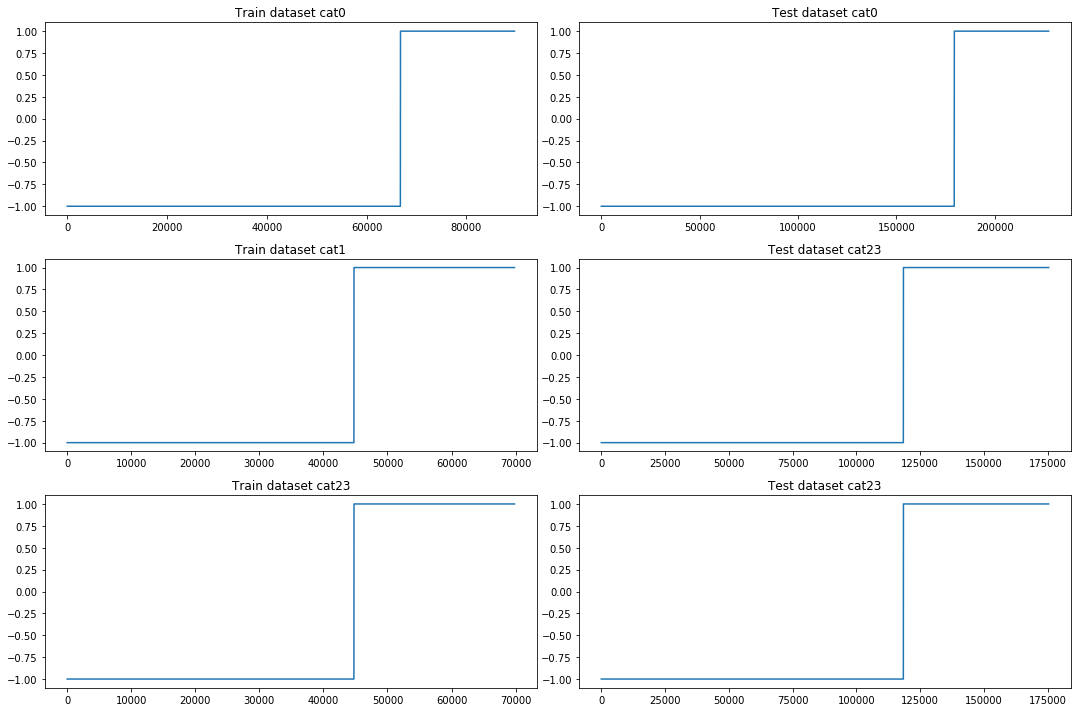

In [51]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

# Cat 0
ax1.plot(np.sort(y0))
ax1.title.set_text("Train dataset cat0")
ax2.plot(np.sort(y_pred0))
ax2.title.set_text("Test dataset cat0")

# Cat 1
ax3.plot(np.sort(y1))
ax3.title.set_text("Train dataset cat1")
ax4.plot(np.sort(y_pred1))
ax4.title.set_text("Test dataset cat23")

# Cat 2 and 3
ax5.plot(np.sort(y1))
ax5.title.set_text("Train dataset cat23")
ax6.plot(np.sort(y_pred1))
ax6.title.set_text("Test dataset cat23")

plt.tight_layout()  # Optional ... often improves the layout 

In [52]:
total_length = y_pred0.shape[0] + y_pred1.shape[0] + y_pred2.shape[0]
y_pred = np.zeros((total_length,))
y_pred[np.where(rows_to_keep_validate0)] = y_pred0
y_pred[np.where(rows_to_keep_validate1)] = y_pred1
y_pred[np.where(rows_to_keep_validate2)] = y_pred2

In [53]:
total_length

568238

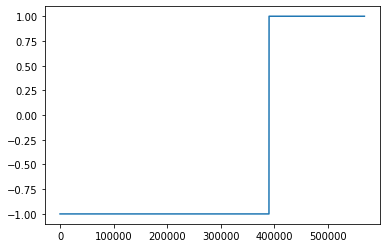

In [54]:
plt.plot(np.sort(y_pred))

In [55]:
time_day = datetime.datetime.now().day
time_hour = datetime.datetime.now().hour
time_min = datetime.datetime.now().minute
time_second = datetime.datetime.now().second

time = str(time_day)+"-"+str(time_hour)+"-"+str(time_min)+"-"+str(time_second)

OUTPUT_PATH = 'submission'+"_"+str(time)+".csv"
#print(weights_LS.shape)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)